In [4]:
#massa do veículo HB20 - 16.5kg
mpneu=16.5
#densidade do ar
do=1.2013
#volume do ar no pneu (Litros)
vo=10
#massa do ar no pneu
mar=do*vo
#raio do pneu aro 14 - 24.25cm -> 0.2425m
raio=0.2425
#velocidade angular de rotação do pneu do carro (rad/s)
w=123.7
#velocidade média do carro - 108km/h -> 30m/s
v=30
#Área da superfície da borracha (m2) - pneu de aro 14 - 2665,075 cm2 -> 0.2665075 m2
Ab=0.2665075
#Temperatura da borracha
Tb=20+273.15
#coeficiente de transferência convectiva do ar - W/m2*K
hconv=8.05
#Temperatura ambiente
Tar=20+273.15
#calor específico do ar - kJ/kg*K
car=1012
#calor específico da borracha - kJ/kg*K
cpneu=1590
#984

In [5]:
def EquacoesDiferenciais(Y0,t):
    T0=Y0[0]
    t0=Y0[1]
    
    Qatrito = 0.2*(mpneu*(w**2))/2 #20% da Ec convertida em Et
    Qext = hconv * Ab * (T0 - Tar) #fluxo de calor da borracha pro ar externo ao pneu por convecção
    Qint = hconv * Ab * (T0 - t0) #fluxo de calor da borracha pro ar interno ao pneu por convecção
    
    dT0dt = (1/mpneu*cpneu)  * (Qatrito - Qext - Qint) #Temperatura da borracha
    dt0dt = (1/mar*car) * Qint #Temperatura do ar interno
    
    return [dT0dt,dt0dt]

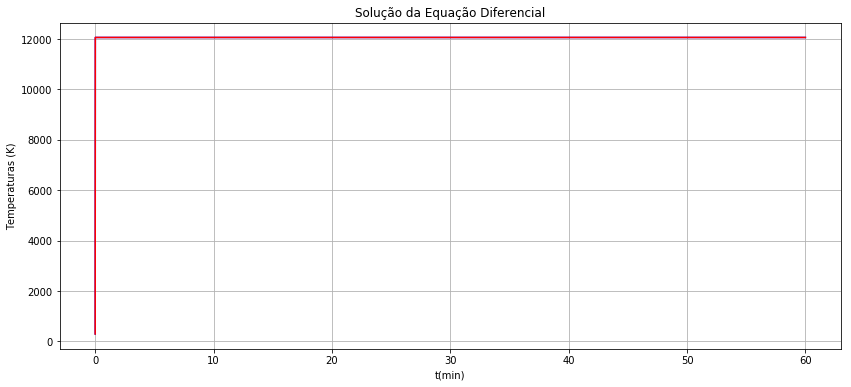

In [6]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

lista_tempo=np.arange(0,3600,0.1)
Y0=[20+273.15,20+273.15]

Solucao=odeint(EquacoesDiferenciais,Y0,lista_tempo)

plt.figure(figsize = [14, 6])
#plt.plot(lista_tempo/3600, Solucao,'b', label="T ar interno")
plt.plot(lista_tempo/60, Solucao[:, 0],'b', label="Temperatura Borracha") 
plt.plot(lista_tempo/60, Solucao[:, 1],'r', label="Temperatura Ar Interno")
plt.ylabel('Temperaturas (K)')
plt.xlabel('t(min)')
plt.title('Solução da Equação Diferencial')
plt.grid(True)
plt.show()